In [10]:
# import the necessary packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [11]:
# load the low resolution world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world

/var/folders/k4/l411pq3x09vb8vh81m4x0g740000gn/T/ipykernel_87226/2122652580.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


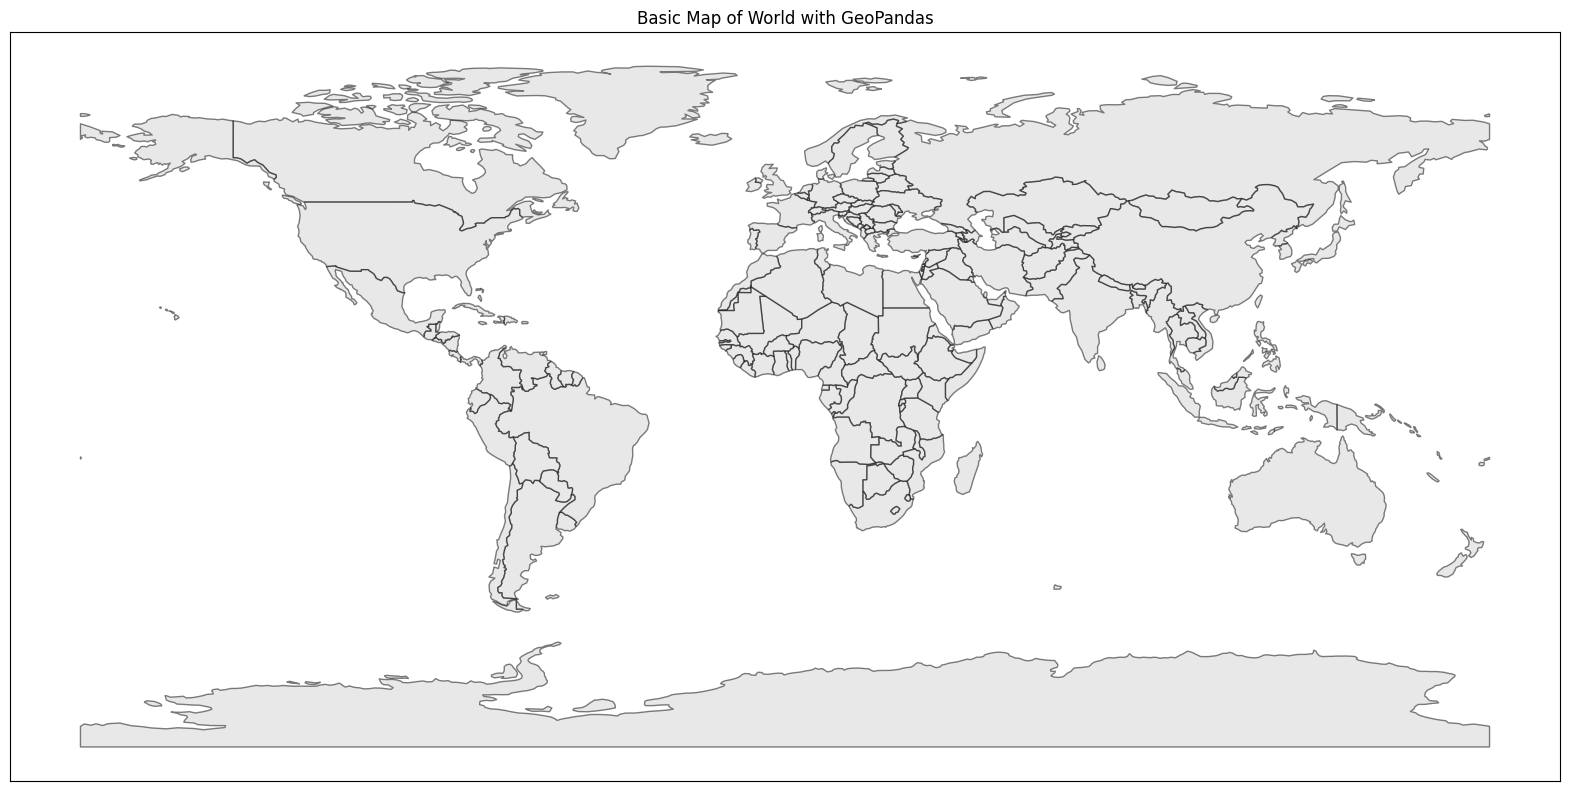

In [12]:
# initialize an empty figure and add an axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot a basic map of the world
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Basic Map of World with GeoPandas")
plt.show()

In [13]:
# display the continents, along with the number of countries per continent
world["continent"].value_counts()

continent
Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

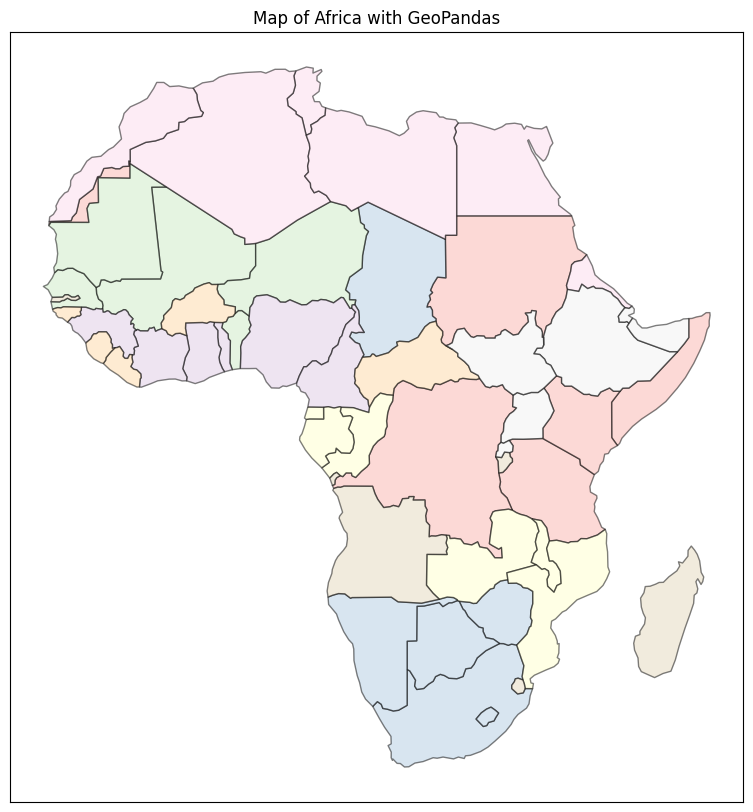

In [14]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# grab all African countries
africa = world[world["continent"] == "Africa"]

# plot a basic map of Asia
africa.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of Africa with GeoPandas")
plt.show()

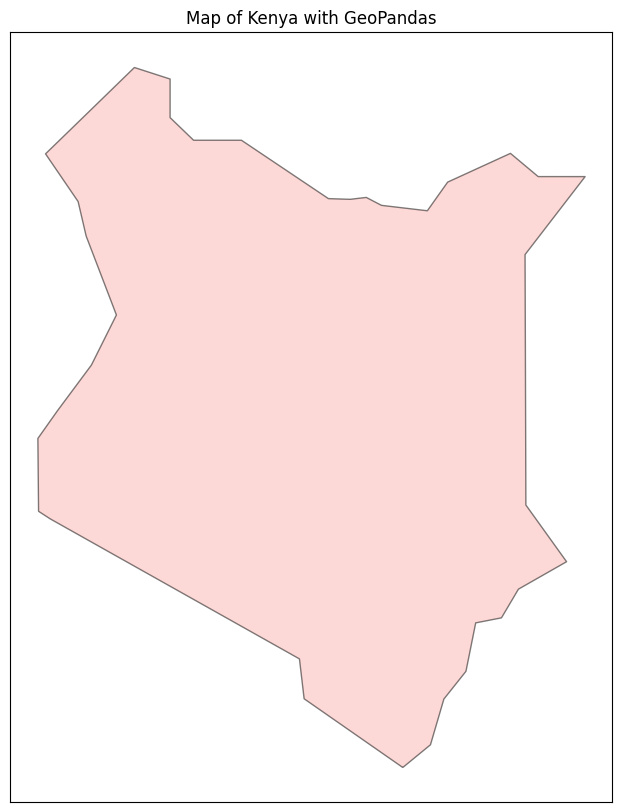

In [15]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# grab the country of Kenya
kenya = africa[africa["name"] == "Kenya"]

# plot a basic map of Kenya
kenya.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of Kenya with GeoPandas")
plt.show()

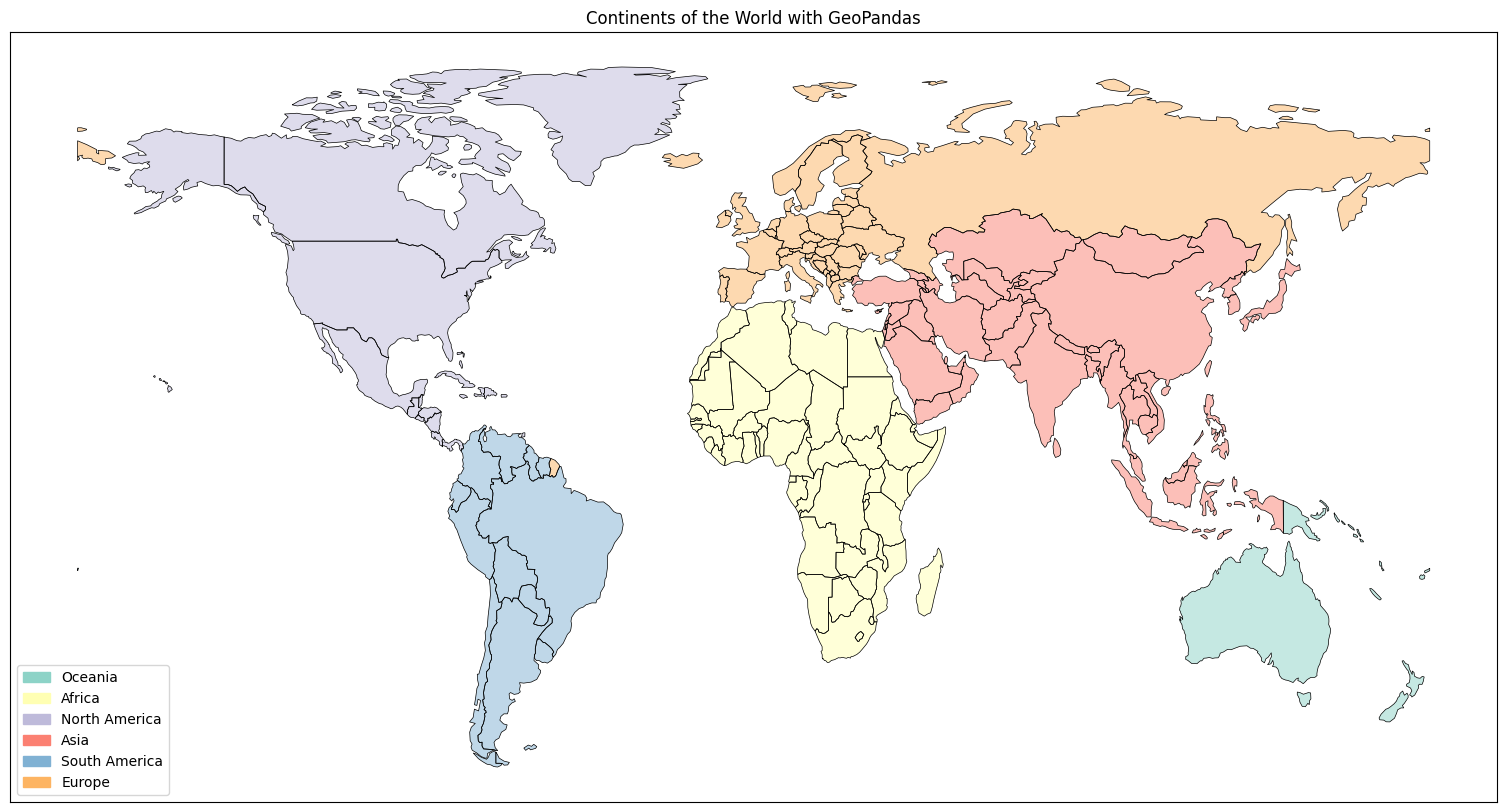

In [16]:
# initialize a final empty figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# drop "Antarctica" and "Seven seas" from the dataframe (which will make our
# world map visualization a bit prettier)
drop_idxs = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world = world.drop(world[drop_idxs].index)

# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# grab the unique set of continents, generate a unique color for each one,
# and initialize the list of patches
continents = world["continent"].unique()
colors = sns.color_palette("Set3", len(continents))
patches = []

# loop over the continent names and corresponding colors
for (continent_name, color) in list(zip(continents, colors)):
    # grab all countries that belong to the continent, then plot each of the
    # continents, giving each a unique color
    continent = world[world["continent"] == continent_name]
    continent.plot(ax=ax, color=color, alpha=0.5)

    # generate a patch for the current continent
    patch = mpatches.Patch(label=continent_name, color=color)
    patches.append(patch)

# add the patches to the map
ax.legend(handles=patches, loc="lower left")

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Continents of the World with GeoPandas")
plt.show()